In [20]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 图像阈值

```python
ret, dst = cv2.threshold(src, thresh, maxval, type)
```

- `src` 输入图，只能输入单通道图像
- `dst` 输出图
- `thresh` 阈值
- `maxval` 当图像超过阈值或者小于阈值时，所赋予的值（由`type`决定）
- `type` 操作类型
  - `cv2.THRESH_BINARY` 超过阈值的部分取`maxval`，小于取`0`
  - `cv2.THRESH_BINARY_INV` 👆的反转
  - `cv2.THRESH_TRUNC` 大于阈值的部分设为`thresh`，否则不变
  - `cv2.THRESH_TOZERO` 大于阈值的部分不改变，否则设为`0`
  - `cv2.THRESH_TOZERO_INV` 👆的反转

In [4]:
img_gray = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)

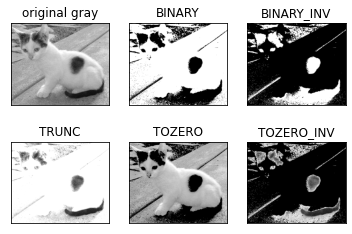

In [6]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original gray', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## 图像平滑

In [7]:
img = cv2.imread('./lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
print(img[:1, :3])
print(blur[:1, :3])

[[[125 137 226]
  [125 137 226]
  [133 137 223]]]
[[[125 137 226]
  [128 137 225]
  [129 137 224]]]


In [14]:
# 方框滤波
# 基本和均值一样，可以选择归一化
# -1 表示通道数一致
# normalize 是否归一化（除以9）
box = cv2.boxFilter(img, -1, (3, 3), normalize=True)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
print(img[:1, :3])
print(box[:1, :3])

[[[125 137 226]
  [125 137 226]
  [133 137 223]]]
[[[125 137 226]
  [128 137 225]
  [129 137 224]]]


In [16]:
# 不归一化（不除以9），容易越界
box = cv2.boxFilter(img, -1, (3, 3), normalize=False)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
print(img[:1, :3])
print(box[:1, :3])

[[[125 137 226]
  [125 137 226]
  [133 137 223]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]]]


In [18]:
# 高斯滤波
# 更重视中间
gau = cv2.GaussianBlur(img, (5, 5), 1)

cv2.imshow('gauss', gau)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# 中值滤波
# 用中间值代替
median = cv2.medianBlur(img, 5)

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# 将三个图像拼接，horizontal
res = np.hstack((blur, gau, median))

cv2.imshow('all', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# 将三个图像拼接，vertical
res = np.vstack((blur, gau, median))

cv2.imshow('all', res)
cv2.waitKey(0)
cv2.destroyAllWindows()